# Creating a Unit

All unit operations are created by passing a name and both inlet and outlet streams. The parent [Unit](../API/Unit.txt) class does nothing when simulated, but is used here as a general example that applies to all Unit child classes (e.g. heat exchangers, mixers) which do implement modeling algorithms. 

## Key parameters

Initialize a Unit object with an `ID`, `ins` streams, and `outs` streams. Either an iterable of Stream objects, or a Stream object may work for `ins` and `outs`:

In [1]:
from biosteam import Unit, Stream, settings, main_flowsheet
import biosteam as bst
bst.nbtutorial()
settings.set_thermo(['Water'])
ins = Stream('in0')
outs = [Stream('out0')]
U1 = Unit(ID='U1', ins=ins, outs=outs)
U1.show(data=False) # Passing data as False returns only stream names

Unit: U1
ins...
[0] in0
outs...
[0] out0


You can also view a diagram to check connections:

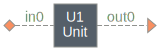

In [2]:
U1.diagram()

IDs for Stream objects can also be used instead:

In [3]:
U2 = Unit('U2', ins='', outs=['']) # Empty strings default unused IDs
U2.show(data=False)

Unit: U2
ins...
[0] s1
outs...
[0] s2


## Parameter defaults

By default, a unique `ID` is chosen, missing streams are given to `ins`, and empty streams to `outs`:

In [4]:
unit = Unit()
unit.show(data=False)

Unit: U3
ins...
[0] missing stream
outs...
[0] s3


For either `ins` or `outs`, if None is given, missing streams are initialized. If an empty iterable is given, empty streams are initialized:

In [5]:
U4 = Unit('U4', ins=None, outs=None)
U4.show(data=False)

Unit: U4
ins...
[0] missing stream
outs...
[0] missing stream


In [6]:
U5 = Unit('U5', ins=(), outs=())
U5.show(data=False)

Unit: U5
ins...
[0] s4
outs...
[0] s5


The number of default streams is different for each Unit subclass: 

In [7]:
from biosteam import Mixer, Splitter
Mixer().show(data=False)

Mixer: M1
ins...
[0] missing stream
[1] missing stream
outs...
[0] s6


In [8]:
Splitter(split=0.5).show(data=False)

Splitter: S1
ins...
[0] missing stream
outs...
[0] s7
[1] s8


Notice how the starting letter for default IDs vary between unit operations. This is because default names follow the "area naming convention" as explained in the following section.

## Area naming convention

Default IDs for unit operations follow the area naming convention based on {letter}{area + number} where the letter depends on the unit operation as follows:

* C: Centrifuge
* D: Distillation column
* E: Evaporator
* F: Flash tank
* H: Heat exchange
* M: Mixer
* P: Pump (including conveying belt)
* R: Reactor
* S: Splitter (including solid/liquid separator)
* T: Tank or bin for storage
* U: Other units
* J: Junction, not a physical unit (serves to adjust streams)
* PS: Process specificiation, not a physical unit (serves to adjust streams)

Continue creating unit operations following the area naming convention: 

In [9]:
Mixer().show(data=False)

Mixer: M2
ins...
[0] missing stream
[1] missing stream
outs...
[0] s9


In [10]:
Splitter(split=0.5).show(data=False)

Splitter: S2
ins...
[0] missing stream
outs...
[0] s10
[1] s11


In [11]:
Splitter(split=0.5).show(data=False)

Splitter: S3
ins...
[0] missing stream
outs...
[0] s12
[1] s13


Notice how there were no name conflicts for default IDs. 

Create a mixer following the area naming convention, this time starting from nunber 101: 

In [12]:
Mixer(100).show(data=False)

Mixer: M101
ins...
[0] missing stream
[1] missing stream
outs...
[0] s14
